In [1]:
#conda install datasets matplotlib pandas, conda activate python_course 
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) and isinstance(x, str) else x)


c:\Users\seane\Anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#MATPLOTLIB - Scatterplots: df.plot(kind = 'scatter')

#df = pd.DataFrame(data) converts into dataframe

df = df[df['job_title_short'] =='Data Analyst'].copy()



In [7]:
df_exploded = df.explode('job_skills')
df_exploded



job_skills
airflow       2002
airtable        88
alteryx       4570
angular        376
angular.js       2
              ... 
wrike           39
wsl             16
xamarin          2
yarn            76
zoom           465
Length: 235, dtype: int64

In [20]:
#need to group job_skills for count and salary_year_avg, we need to agg median salary

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count =('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median') # is a tuble with ('column of interest', 'how we want to agg it')
)


skills_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

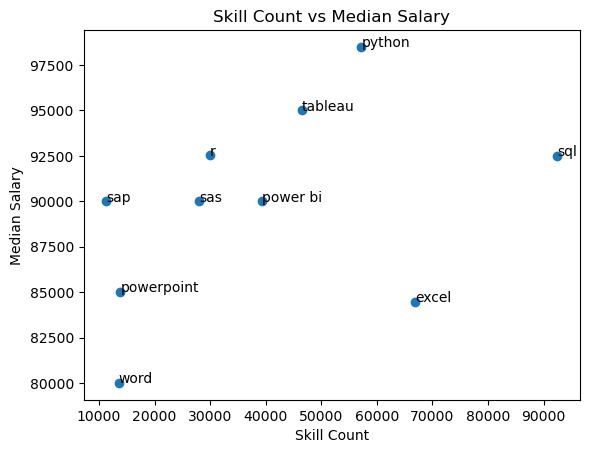

: 

In [31]:
plt.scatter(skills_stats['skill_count'], skills_stats['median_salary'])

# Adding text labels
for i in range(len(skills_stats)):
    plt.text(skills_stats['skill_count'].iloc[i], skills_stats['median_salary'].iloc[i], skills_stats.index[i])

plt.xlabel('Skill Count')
plt.ylabel('Median Salary')
plt.title('Skill Count vs Median Salary')
plt.show()